# Customer Churn Analysis

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.preprocessing import power_transform
from scipy.stats import zscore

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix, roc_curve, roc_auc_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/Telecom_customer_churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
data.shape

(7043, 21)

In [4]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

# Data Cleaning

In [5]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

There is no null values

In [6]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

SeniorCitizen, tenure, MonthlyCharges are continuous in nature. TotalCharges is also continuous but shown an object data type,so
we have to check the issue in the column.
And left of the columns are object data type.

In [7]:
data['TotalCharges'].value_counts()

          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: TotalCharges, Length: 6531, dtype: int64

There is eleven missing values, so we replace missing value by nan, then convert object data into float and then impute.

In [8]:
data['TotalCharges']=data['TotalCharges'].replace(' ',np.nan)

In [9]:
data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Convert object data into float data

In [10]:
data['TotalCharges']=data['TotalCharges'].astype(float)

                                      Imputing Technique

In [11]:
data['TotalCharges']=data['TotalCharges'].fillna(data['TotalCharges'].mean())

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [13]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Data Visualisation

                                     Visualisation of categorical data
    
 SeniorCitizen is represent in a integer type but in actual it is a categorical data 

In [14]:
data_visualization_nominal=data.drop(['tenure','MonthlyCharges','TotalCharges'],axis=1)
data_visualization_nominal.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'Churn'],
      dtype='object')

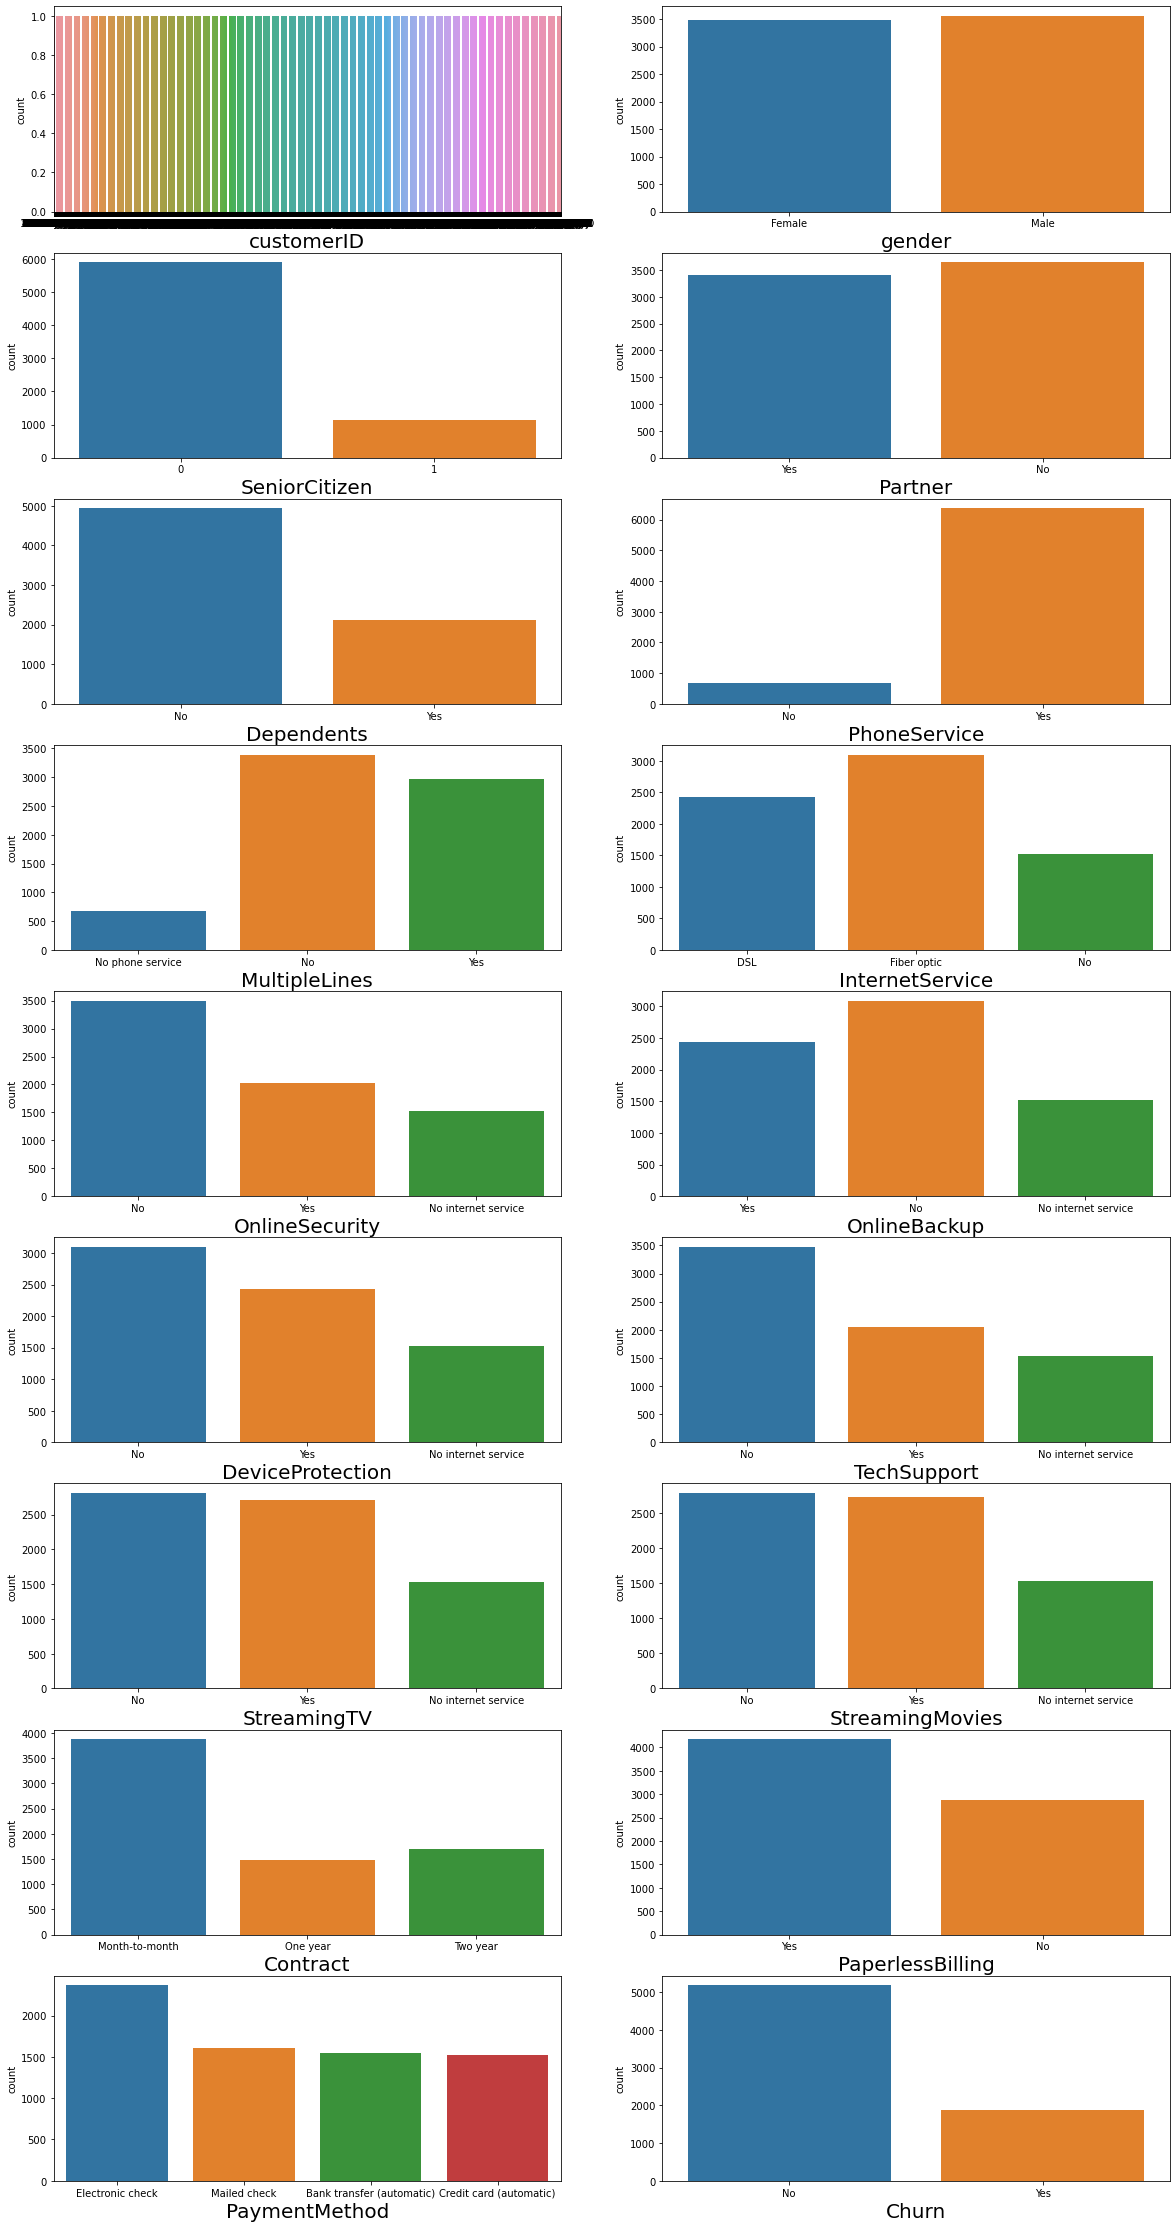

In [15]:
plt.figure(figsize=(20,40))
num =1

for column in data_visualization_nominal:
    if num <=18:
        ax = plt.subplot(9,2,num)
        sns.countplot(x=column,data=data_visualization_nominal)
        plt.xlabel(column,fontsize=20)
        
    num+=1
plt.show()  

In [16]:
data['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

Data of Churn column is imbalnced so,we have to balanced it by SMOTE method.This we done while fitting a model

                                       Visualisation of continuous data

<AxesSubplot:xlabel='tenure', ylabel='Density'>

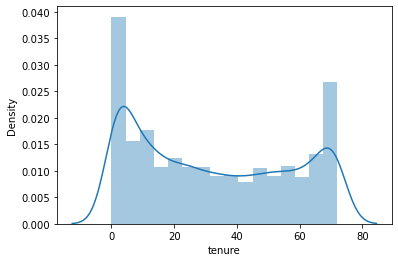

In [17]:
sns.distplot(data['tenure'])

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Density'>

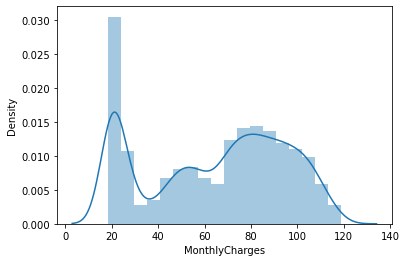

In [18]:
sns.distplot(data['MonthlyCharges'])

<AxesSubplot:xlabel='TotalCharges', ylabel='Density'>

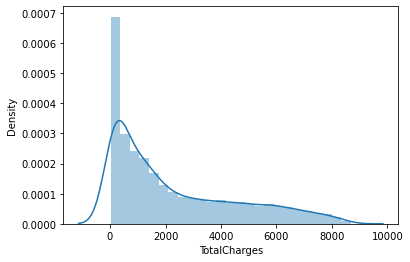

In [19]:
sns.distplot(data['TotalCharges'])

                                        Encoding Technique

In [20]:
enc=OrdinalEncoder()

In [21]:
for i in data.columns:
    if data[i].dtypes=="object":
        data[i]=enc.fit_transform(data[i].values.reshape(-1,1))

In [22]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375.0,0.0,0,1.0,0.0,1,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.85,29.85,0.0
1,3962.0,1.0,0,0.0,0.0,34,1.0,0.0,0.0,2.0,...,2.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,1889.50,0.0
2,2564.0,1.0,0,0.0,0.0,2,1.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,108.15,1.0
3,5535.0,1.0,0,0.0,0.0,45,0.0,1.0,0.0,2.0,...,2.0,2.0,0.0,0.0,1.0,0.0,0.0,42.30,1840.75,0.0
4,6511.0,0.0,0,0.0,0.0,2,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,151.65,1.0


# Analysis

In [23]:
data.describe()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,...,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,3521.000000,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.940508,0.872923,0.790004,...,0.904444,0.797104,0.985376,0.992475,0.690473,0.592219,1.574329,64.761692,2283.300441,0.265370
std,2033.283305,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.948554,0.737796,0.859848,...,0.879949,0.861551,0.885002,0.885091,0.833755,0.491457,1.068104,30.090047,2265.000258,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000
25%,1760.500000,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.500000,402.225000,0.000000
50%,3521.000000,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.350000,1400.550000,0.000000
75%,5281.500000,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.850000,3786.600000,1.000000
max,7042.000000,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,8684.800000,1.000000


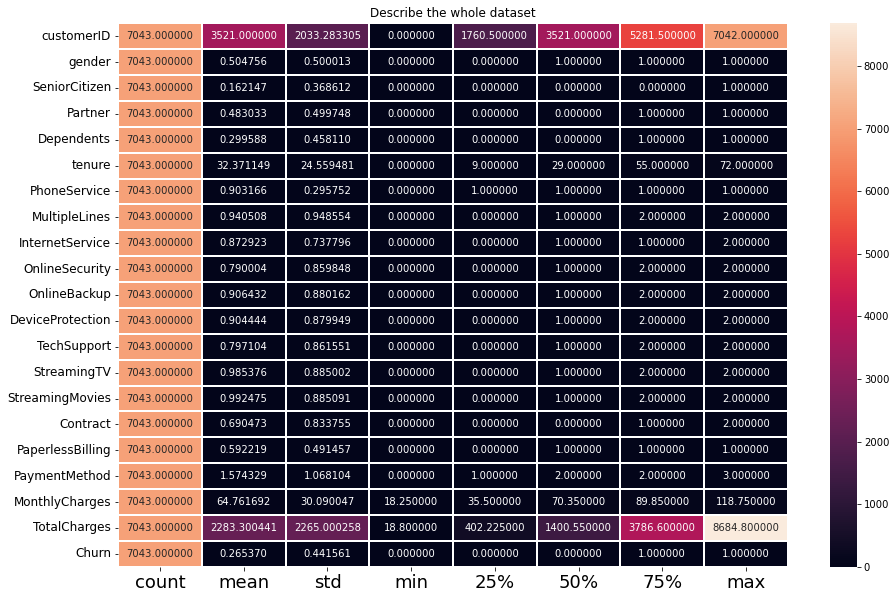

In [24]:
plt.figure(figsize=(15,10))
sns.heatmap(data.describe().transpose(),linewidth=2,annot=True,fmt='f')
plt.xticks(fontsize=18)
plt.yticks(fontsize=12)
plt.title("Describe the whole dataset")
plt.show()

There is no null values.

The number of rows and columns are:
    rows=7043
    columns=21

The mean,standard deviation, minimum and maximum values are:
    
    * customerID:
        mean=3521.00
        std=2033.28
        minimum=0.00
        maximum=7042.00
        
    * gender:
        mean=0.50
        std=0.50
        minimum=0.00
        maximum=1.00
        
    * SeniorCitizen:
        mean=0.16
        std=0.36
        minimum=0.00
        maximum=1.00
        
    * Partner:
        mean=0.48
        std=0.49
        minimum=0.00
        maximum=1.0
        
    * Dependents:
        mean=0.29
        std=0.45
        minimum=0.00
        maximum=1.00
        
    * tenure:
        mean=32.37
        std=24.55
        minimum=0.00
        maximum=72.00
        
    * PhoneService:
        mean=0.93
        std=0.29
        minimum=0.00
        maximum=1.00
        
    * MultipleLines:
        mean=0.94
        std=0.94
        minimum=0.00
        maximum=2.00
        
    * InternetService:
        mean=0.87
        std=0.73
        minimum=0.00
        maximum=2.00
        
    * OnlineSecurity:
        mean=0.79
        std=0.85
        minimum=0.00
        maximum=2.00
        
    * OnlineBackup:
        mean=0.90
        std=0.88
        minimum=0.00
        maximum=2.00
        
    * DeviceProtection:
        mean=0.90
        std=0.87
        minimum=0.00
        maximum=2.00
      
    * TechSupport:
        mean=0.79
        std=0.86
        minimum=0.00
        maximum=2.00
        
    * StreamingTV:
        mean=0.98
        std=0.88
        minimum=0.00
        maximum=2.00
        
    * StreamingMovies:
        mean=0.99
        std=0.88
        minimum=0.00
        maximum= 2.00
        
    * Contract:
        mean=0.69
        std=0.83
        minimum=0.00
        maximum=2.00
        
    * PaperlessBilling:
        mean=0.59
        std=0.49
        minimum=0.00
        maximum=1.00
        
    * PaymentMethod:
        mean=1.57
        std=1.06
        minimum=0.00
        maximum=3.00
        
    * MonthlyCharges:
        mean=64.76
        std=30.09
        minimum=18.25
        maximum=118.75
        
    * TotalCharges:
        mean=2283.30
        std=2265.00
        minimum=18.00
        maximum=8684.80

                                          Correaltion

In [25]:
data.corr()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,1.000000,0.006288,-0.002074,-0.026729,-0.012823,0.008035,-0.006483,0.004316,-0.012407,0.013292,...,-0.006918,0.001140,-0.007777,-0.016746,0.015028,-0.001945,0.011604,-0.003916,-0.000270,-0.017447
gender,0.006288,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.006739,-0.000863,-0.015017,...,0.000549,-0.006825,-0.006421,-0.008743,0.000126,-0.011754,0.017352,-0.014569,0.000048,-0.008612
SeniorCitizen,-0.002074,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.146185,-0.032310,-0.128221,...,-0.021398,-0.151268,0.030776,0.047266,-0.142554,0.156530,-0.038551,0.220173,0.102395,0.150889
Partner,-0.026729,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142410,0.000891,0.150828,...,0.166330,0.126733,0.137341,0.129574,0.294806,-0.014877,-0.154798,0.096848,0.318812,-0.150448
Dependents,-0.012823,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024991,0.044590,0.152166,...,0.080537,0.133524,0.046885,0.021321,0.243187,-0.111377,-0.040292,-0.113890,0.064535,-0.164221
tenure,0.008035,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.343032,-0.030359,0.325468,...,0.371105,0.322942,0.289373,0.296866,0.671607,0.006152,-0.370436,0.247900,0.824757,-0.352229
PhoneService,-0.006483,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.020538,0.387436,-0.015198,...,0.003727,-0.019158,0.055353,0.043870,0.002247,0.016505,-0.004184,0.247398,0.112851,0.011942
MultipleLines,0.004316,-0.006739,0.146185,0.142410,-0.024991,0.343032,-0.020538,1.000000,-0.109216,0.007141,...,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,-0.176793,0.433576,0.452883,0.038037
InternetService,-0.012407,-0.000863,-0.032310,0.000891,0.044590,-0.030359,0.387436,-0.109216,1.000000,-0.028416,...,0.044944,-0.026047,0.107417,0.098350,0.099721,-0.138625,0.086140,-0.323260,-0.175429,-0.047291
OnlineSecurity,0.013292,-0.015017,-0.128221,0.150828,0.152166,0.325468,-0.015198,0.007141,-0.028416,1.000000,...,0.175985,0.285028,0.044669,0.055954,0.374416,-0.157641,-0.096726,-0.053878,0.254308,-0.289309


<AxesSubplot:>

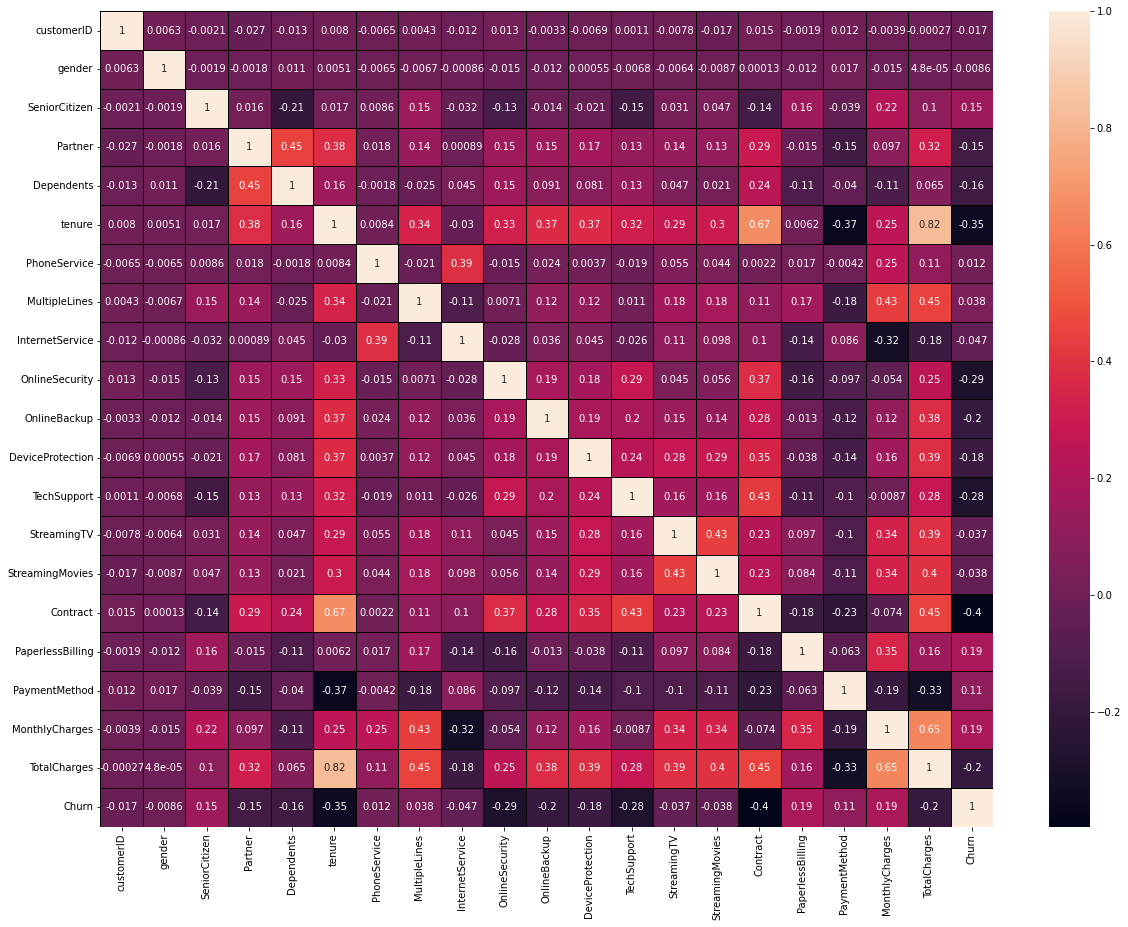

In [26]:
plt.figure(figsize=(20,15))
sns.heatmap(data.corr(),annot=True,linewidth=0.5,linecolor='black')

Correlation of feature variable with the target variable

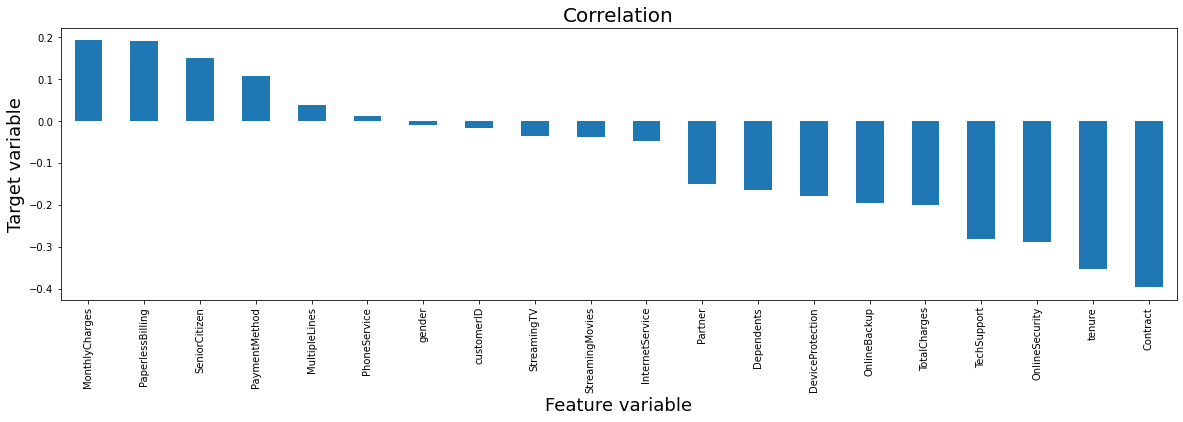

In [27]:
plt.figure(figsize=(20,5))
data.corr()['Churn'].sort_values(ascending=False).drop(['Churn']).plot(kind='bar')
plt.xlabel('Feature variable',fontsize=18)
plt.ylabel('Target variable',fontsize=18)
plt.title('Correlation',fontsize=20)
plt.show()

The correlation of independent variable with the dependent variable:
    
    * customerID has 1% negatively correlation with the target variable.       
    * gender has 0.8% negatively correlation with the target variable.             
    * SeniorCitizen has 15% positively correlation with the target variable.     
    * Partner has 15% negatively correlation with the target variable.            
    * Dependents has 16% negatively correlation with the target variable.        
    * tenure has 35% negatively correlation with the target variable.              
    * PhoneService has 1% positively correlation with the target variable.      
    * MultipleLines has 3% positively correlation with the target variable.      
    * InternetService has 4% negatively correlation with the target variable.   
    * OnlineSecurity has 29% negatively correlation with the target variable.     
    * OnlineBackup has 2% negatively correlation with the target variable.      
    * DeviceProtection has 18% negatively correlation with the target variable.   
    * TechSupport has 28% negatively correlation with the target variable.        
    * StreamingTV has 3% negatively correlation with the target variable.        
    * StreamingMovies has 3% negatively correlation with the target variable.   
    * Contract has 4% negatively correlation with the target variable.          
    * PaperlessBilling has 19% positively correlation with the target variable.   
    * PaymentMethod has 11% positively correlation with the target variable.     
    * MonthlyCharges has 19% positively correlation with the target variable.    
    * TotalCharges has 2% negatively correlation with the target variable. 
       

          Check the relation of independent variable to another independent variable having higher relation(above 60)

Relation b/w tenure and TotalCharges


<AxesSubplot:xlabel='tenure', ylabel='TotalCharges'>

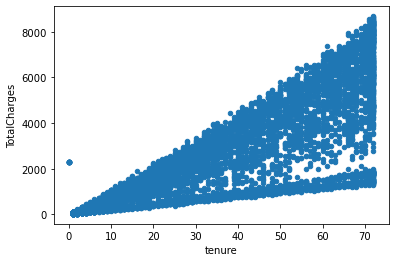

In [28]:
print("Relation b/w tenure and TotalCharges")
data.plot(kind='scatter', x='tenure', y='TotalCharges',figsize=(6,4))

Initially tenure is zero TotalChrages is also zero but one charge is above 2000, otherwise the tenure increases the Totalcharges is also goes on increasing.

Relation b/w tenure and Contract


<AxesSubplot:xlabel='Contract', ylabel='tenure'>

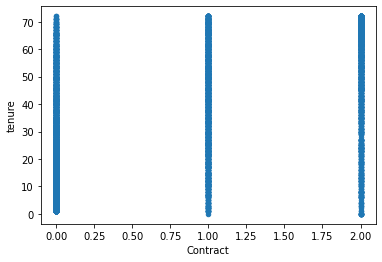

In [29]:
print("Relation b/w tenure and Contract")
data.plot(kind='scatter', x='Contract', y='tenure',figsize=(6,4))

Relation b/w MonthlyCharges and TotalCharges


<AxesSubplot:xlabel='MonthlyCharges', ylabel='TotalCharges'>

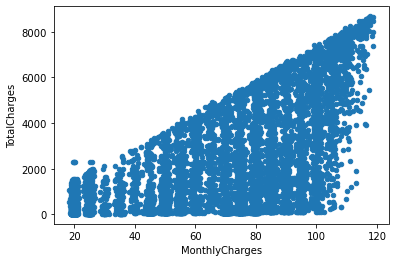

In [30]:
print("Relation b/w MonthlyCharges and TotalCharges")
data.plot(kind='scatter', x='MonthlyCharges', y='TotalCharges',figsize=(6,4))

                         Skewness and outliers are work only on continuous data

In [31]:
# df data has only continuous data

df=data[['tenure','MonthlyCharges','TotalCharges']].copy()

                                               Outliers

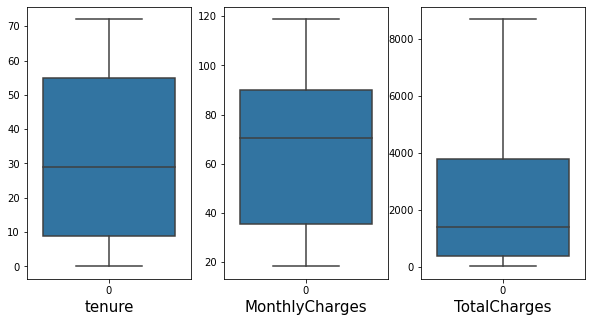

In [32]:
plt.figure(figsize=(10,5))
number = 1

for column in df:
    if number <=3:
        plt.subplot(1,3,number)
        ax = sns.boxplot(data=df[column])
        plt.xlabel(column,fontsize=15)
       
    number+=1
plt.show()    

There is no outliers in the dataset.

In [33]:
df.skew()

tenure            0.239540
MonthlyCharges   -0.220524
TotalCharges      0.962394
dtype: float64

Take (-0.5,0.5) as a threshold range of the skewness

In TotalCharges column skewness is present 

                                        Variance Inflation Factor

In [34]:
x=data.drop(['Churn'],axis=1)
y=data['Churn']

scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(x_scaled,i)for i in  range(x_scaled.shape[1])]
vif['Input']= x.columns
vif

,VIF,Input
0,3.637729,customerID
1,1.951264,gender
2,1.365517,SeniorCitizen
3,2.819662,Partner
4,1.964651,Dependents
5,16.192794,tenure
6,13.774028,PhoneService
7,2.724549,MultipleLines
8,4.384265,InternetService
9,2.267135,OnlineSecurity


In four columns VIF is greater than 5, so we drop one column (ie, TotalCharges)and again check VIF. 

In [35]:
data=data.drop(['TotalCharges'],axis=1)

In [36]:
x=data.drop(['Churn'],axis=1)
y=data['Churn']

scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(x_scaled,i)for i in  range(x_scaled.shape[1])]
vif['Input']= x.columns
vif

,VIF,Input
0,3.521524,customerID
1,1.938466,gender
2,1.362387,SeniorCitizen
3,2.818943,Partner
4,1.959722,Dependents
5,7.440973,tenure
6,12.879611,PhoneService
7,2.724045,MultipleLines
8,4.382149,InternetService
9,2.260302,OnlineSecurity


Now drop PhoneService column from the data

In [37]:
data=data.drop(['PhoneService'],axis=1)

In [38]:
x=data.drop(['Churn'],axis=1)
y=data['Churn']

scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(x_scaled,i)for i in  range(x_scaled.shape[1])]
vif['Input']= x.columns
vif

,VIF,Input
0,3.377045,customerID
1,1.913108,gender
2,1.361476,SeniorCitizen
3,2.815724,Partner
4,1.949768,Dependents
5,7.438735,tenure
6,2.671912,MultipleLines
7,2.554749,InternetService
8,2.234258,OnlineSecurity
9,2.429311,OnlineBackup


Now drop tenure column from the data

In [39]:
data=data.drop(['tenure'],axis=1)

In [40]:
x=data.drop(['Churn'],axis=1)
y=data['Churn']

scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(x_scaled,i)for i in  range(x_scaled.shape[1])]
vif['Input']= x.columns
vif

,VIF,Input
0,3.365811,customerID
1,1.908146,gender
2,1.356410,SeniorCitizen
3,2.696216,Partner
4,1.946174,Dependents
5,2.548290,MultipleLines
6,2.554075,InternetService
7,2.192023,OnlineSecurity
8,2.329745,OnlineBackup
9,2.585607,DeviceProtection


Drop MonthlyCharges column from the data

In [41]:
data=data.drop(['MonthlyCharges'],axis=1)

In [42]:
x=data.drop(['Churn'],axis=1)
y=data['Churn']

scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(x_scaled,i)for i in  range(x_scaled.shape[1])]
vif['Input']= x.columns
vif

,VIF,Input
0,3.279450,customerID
1,1.895947,gender
2,1.328971,SeniorCitizen
3,2.668227,Partner
4,1.942107,Dependents
5,2.197302,MultipleLines
6,2.371054,InternetService
7,2.184731,OnlineSecurity
8,2.287448,OnlineBackup
9,2.545564,DeviceProtection


Now multicolinearity is not exist in the dataset.

In [43]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,5375.0,0.0,0,1.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0
1,3962.0,1.0,0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,3.0,0.0
2,2564.0,1.0,0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0
3,5535.0,1.0,0,0.0,0.0,1.0,0.0,2.0,0.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0
4,6511.0,0.0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0


# Model Testing

                                     Over Sampling of Imbalanced data

In [44]:
x=data.drop('Churn',axis=1)
y=data['Churn']

scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

In [45]:
!pip install imbalanced-learn

In [46]:
from imblearn.over_sampling import SMOTE
from collections import Counter

In [47]:
x_scaled.shape,y.shape

((7043, 16), (7043,))

In [48]:
Oversample=SMOTE(0.80)
x_scaled,y=Oversample.fit_resample(x_scaled,y)

In [49]:
x_scaled.shape,y.shape

((9313, 16), (9313,))

In [50]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size = 0.20,random_state =41)
print("The no. classes before fit {}".format(Counter(y_train)))

The no. classes before fit Counter({0.0: 4126, 1.0: 3324})


In [51]:
y_test.value_counts()

0.0    1048
1.0     815
Name: Churn, dtype: int64

Now the data is balanced for the classification process

                                        Logistic Regression

In [52]:
lr=LogisticRegression()

In [54]:
for i in range(0,100):
    x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.20,random_state = i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    print("The model perform very well")
    print("random state",i)
    print("Training accuracy score:",accuracy_score(y_train,pred_train)*100)
    print("Testing accuracy score:",accuracy_score(y_test,pred_test)*100)
    print('\n')

The model perform very well
random state 0
Training accuracy score: 75.08724832214764
Testing accuracy score: 74.28878153515835


The model perform very well
random state 1
Training accuracy score: 75.1275167785235
Testing accuracy score: 74.39613526570048


The model perform very well
random state 2
Training accuracy score: 75.38255033557047
Testing accuracy score: 73.6983360171766


The model perform very well
random state 3
Training accuracy score: 74.64429530201342
Testing accuracy score: 75.95276435856147


The model perform very well
random state 4
Training accuracy score: 75.06040268456375
Testing accuracy score: 74.34245840042941


The model perform very well
random state 5
Training accuracy score: 75.15436241610738
Testing accuracy score: 74.12775093934513


The model perform very well
random state 6
Training accuracy score: 75.30201342281879
Testing accuracy score: 74.07407407407408


The model perform very well
random state 7
Training accuracy score: 75.43624161073825
Testin

In [55]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y, test_size=0.20,random_state=73) 

In [56]:
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
accuracy = accuracy_score(y_test,y_pred)*100
print("accuracy score:",accuracy)

accuracy score: 74.93290391841117


In [57]:
cm= confusion_matrix(y_test,y_pred)
print(cm)

[[757 278]
 [189 639]]


In [58]:
clr=classification_report(y_test,y_pred)
print(clr)

              precision    recall  f1-score   support

         0.0       0.80      0.73      0.76      1035
         1.0       0.70      0.77      0.73       828

    accuracy                           0.75      1863
   macro avg       0.75      0.75      0.75      1863
weighted avg       0.75      0.75      0.75      1863



In [59]:
for j in range(2,10):
    cv_score=cross_val_score(lr,x_scaled,y,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold {j} the cv score is {cv_mean}")
    print("\n")

At cross fold 2 the cv score is 0.7472357366547937


At cross fold 3 the cv score is 0.7493833385903459


At cross fold 4 the cv score is 0.7490602945971827


At cross fold 5 the cv score is 0.7489552037443505


At cross fold 6 the cv score is 0.7490600583506483


At cross fold 7 the cv score is 0.7489541714111404


At cross fold 8 the cv score is 0.7493817567069303


At cross fold 9 the cv score is 0.7497046734172852




In [62]:
lrscore=cross_val_score(lr,x_scaled,y,cv=9)
lrc=lrscore.mean()
print('cross val score:',lrc*100)

cross val score: 74.97046734172852


                                        K Neighbors Classifier

In [63]:
knn= KNeighborsClassifier()

In [64]:
for i in range(0,100):
    x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.20,random_state = i)
    knn.fit(x_train,y_train)
    pred_train=knn.predict(x_train)
    pred_test=knn.predict(x_test)
    print("The model perform very well")
    print("random state",i)
    print("Training accuracy score:",accuracy_score(y_train,pred_train)*100)
    print("Testing accuracy score:",accuracy_score(y_test,pred_test)*100)
    print('\n')

The model perform very well
random state 0
Training accuracy score: 83.63758389261746
Testing accuracy score: 74.77187332259795


The model perform very well
random state 1
Training accuracy score: 83.70469798657719
Testing accuracy score: 75.7380568974772


The model perform very well
random state 2
Training accuracy score: 83.4496644295302
Testing accuracy score: 75.8990874932904


The model perform very well
random state 3
Training accuracy score: 83.9731543624161
Testing accuracy score: 76.91894793344069


The model perform very well
random state 4
Training accuracy score: 83.39597315436241
Testing accuracy score: 75.7380568974772


The model perform very well
random state 5
Training accuracy score: 83.70469798657719
Testing accuracy score: 75.57702630166399


The model perform very well
random state 6
Training accuracy score: 83.81208053691275
Testing accuracy score: 75.25496511003757


The model perform very well
random state 7
Training accuracy score: 83.73154362416108
Testing a

In [65]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y, test_size=0.20,random_state=12) 

In [66]:
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)
accuracy = accuracy_score(y_test,y_pred)*100
print("accuracy score:",accuracy)

accuracy score: 77.67042404723564


In [67]:
cm= confusion_matrix(y_test,y_pred)
print(cm)

[[768 287]
 [129 679]]


In [68]:
clr=classification_report(y_test,y_pred)
print(clr)

              precision    recall  f1-score   support

         0.0       0.86      0.73      0.79      1055
         1.0       0.70      0.84      0.77       808

    accuracy                           0.78      1863
   macro avg       0.78      0.78      0.78      1863
weighted avg       0.79      0.78      0.78      1863



In [69]:
for j in range(2,10):
    cv_score=cross_val_score(knn,x_scaled,y,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold {j} the cv score is {cv_mean}")
    print("\n")

At cross fold 2 the cv score is 0.7590476443472377


At cross fold 3 the cv score is 0.7560411029212388


At cross fold 4 the cv score is 0.7581888086711845


At cross fold 5 the cv score is 0.7574401843117109


At cross fold 6 the cv score is 0.7565791075028269


At cross fold 7 the cv score is 0.7618449095799497


At cross fold 8 the cv score is 0.7642028191967907


At cross fold 9 the cv score is 0.7629153078736798




In [70]:
knnscore=cross_val_score(knn,x_scaled,y,cv=8)
knnc=knnscore.mean()
print('cross val score:',knnc*100)

cross val score: 76.42028191967907


                                    Random Forest Classifier

In [71]:
rfc=RandomForestClassifier()

In [72]:
for i in range(0,100):
    x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.20,random_state = i)
    rfc.fit(x_train,y_train)
    pred_train=rfc.predict(x_train)
    pred_test=rfc.predict(x_test)
    print("The model perform very well")
    print("random state",i)
    print("Training accuracy score:",accuracy_score(y_train,pred_train)*100)
    print("Testing accuracy score:",accuracy_score(y_test,pred_test)*100)
    print('\n')

The model perform very well
random state 0
Training accuracy score: 100.0
Testing accuracy score: 81.85721953837896


The model perform very well
random state 1
Training accuracy score: 100.0
Testing accuracy score: 81.105743424584


The model perform very well
random state 2
Training accuracy score: 100.0
Testing accuracy score: 80.89103596349973


The model perform very well
random state 3
Training accuracy score: 100.0
Testing accuracy score: 82.23295759527643


The model perform very well
random state 4
Training accuracy score: 100.0
Testing accuracy score: 80.56897477187333


The model perform very well
random state 5
Training accuracy score: 100.0
Testing accuracy score: 81.42780461621041


The model perform very well
random state 6
Training accuracy score: 99.98657718120806
Testing accuracy score: 80.51529790660226


The model perform very well
random state 7
Training accuracy score: 100.0
Testing accuracy score: 79.49543746645196


The model perform very well
random state 8
Tra

In [73]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y, test_size=0.20,random_state=63)

In [74]:
rfc.fit(x_train,y_train)
y_pred = rfc.predict(x_test)
accuracy = accuracy_score(y_test,y_pred)*100
print("accuracy score:",accuracy)

accuracy score: 82.01825013419216


In [75]:
cm= confusion_matrix(y_test,y_pred)
print(cm)

[[898 164]
 [171 630]]


In [76]:
clr=classification_report(y_test,y_pred)
print(clr)

              precision    recall  f1-score   support

         0.0       0.84      0.85      0.84      1062
         1.0       0.79      0.79      0.79       801

    accuracy                           0.82      1863
   macro avg       0.82      0.82      0.82      1863
weighted avg       0.82      0.82      0.82      1863



In [77]:
for j in range(2,10):
    cv_score=cross_val_score(rfc,x_scaled,y,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold {j} the cv score is {cv_mean}")
    print("\n")

At cross fold 2 the cv score is 0.7838559364869941


At cross fold 3 the cv score is 0.8050114893393318


At cross fold 4 the cv score is 0.8044740951162616


At cross fold 5 the cv score is 0.8080261039071107


At cross fold 6 the cv score is 0.8070531373707469


At cross fold 7 the cv score is 0.8085758831983897


At cross fold 8 the cv score is 0.8115638319838355


At cross fold 9 the cv score is 0.8099592907178477




In [78]:
rfcscore=cross_val_score(rfc,x_scaled,y,cv=8)
rfcc=rfcscore.mean()
print('cross val score:',rfcc*100)

cross val score: 81.24223854401723


                                       Decision Tree Classifier

In [79]:
clf=DecisionTreeClassifier()

In [80]:
for i in range(0,100):
    x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.20,random_state = i)
    clf.fit(x_train,y_train)
    pred_train=clf.predict(x_train)
    pred_test=clf.predict(x_test)
    print("The model perform very well")
    print("random state",i)
    print("Training accuracy score:",accuracy_score(y_train,pred_train)*100)
    print("Testing accuracy score:",accuracy_score(y_test,pred_test)*100)
    print('\n')

The model perform very well
random state 0
Training accuracy score: 100.0
Testing accuracy score: 76.0601180891036


The model perform very well
random state 1
Training accuracy score: 100.0
Testing accuracy score: 74.66451959205583


The model perform very well
random state 2
Training accuracy score: 100.0
Testing accuracy score: 75.14761137949544


The model perform very well
random state 3
Training accuracy score: 100.0
Testing accuracy score: 78.4219001610306


The model perform very well
random state 4
Training accuracy score: 100.0
Testing accuracy score: 73.91304347826086


The model perform very well
random state 5
Training accuracy score: 100.0
Testing accuracy score: 73.5373054213634


The model perform very well
random state 6
Training accuracy score: 100.0
Testing accuracy score: 75.84541062801932


The model perform very well
random state 7
Training accuracy score: 100.0
Testing accuracy score: 74.7181964573269


The model perform very well
random state 8
Training accuracy

In [81]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.20,random_state = 3)

In [82]:
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
accuracy = accuracy_score(y_test,y_pred)*100
print("accuracy score:",accuracy)

accuracy score: 78.47557702630166


In [83]:
cm= confusion_matrix(y_test,y_pred)
print(cm)

[[846 220]
 [181 616]]


In [84]:
clr=classification_report(y_test,y_pred)
print(clr)

              precision    recall  f1-score   support

         0.0       0.82      0.79      0.81      1066
         1.0       0.74      0.77      0.75       797

    accuracy                           0.78      1863
   macro avg       0.78      0.78      0.78      1863
weighted avg       0.79      0.78      0.79      1863



In [85]:
for j in range(2,10):
    cv_score=cross_val_score(clf,x_scaled,y,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold {j} the cv score is {cv_mean}")
    print("\n")

At cross fold 2 the cv score is 0.7297346002802565


At cross fold 3 the cv score is 0.7436980870007913


At cross fold 4 the cv score is 0.7513226422708446


At cross fold 5 the cv score is 0.7417723628140976


At cross fold 6 the cv score is 0.7515376651553473


At cross fold 7 the cv score is 0.7526249615667375


At cross fold 8 the cv score is 0.7537926050469743


At cross fold 9 the cv score is 0.7544405925842868




In [86]:
clfscore=cross_val_score(clf,x_scaled,y,cv=9)
clfc=clfscore.mean()
print('cross val score:',clfc*100)

cross val score: 75.42259889469264


                                              SVC

In [87]:
svc=SVC()

In [88]:
for i in range(0,100):
    x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.20,random_state = i)
    svc.fit(x_train,y_train)
    pred_train=svc.predict(x_train)
    pred_test=svc.predict(x_test)
    print("The model perform very well")
    print("random state",i)
    print("Training accuracy score:",accuracy_score(y_train,pred_train)*100)
    print("Testing accuracy score:",accuracy_score(y_test,pred_test)*100)
    print('\n')

The model perform very well
random state 0
Training accuracy score: 80.99328859060402
Testing accuracy score: 77.67042404723564


The model perform very well
random state 1
Training accuracy score: 81.19463087248322
Testing accuracy score: 77.67042404723564


The model perform very well
random state 2
Training accuracy score: 81.24832214765101
Testing accuracy score: 77.13365539452496


The model perform very well
random state 3
Training accuracy score: 80.67114093959732
Testing accuracy score: 78.4219001610306


The model perform very well
random state 4
Training accuracy score: 81.40939597315436
Testing accuracy score: 77.34836285560924


The model perform very well
random state 5
Training accuracy score: 81.16778523489933
Testing accuracy score: 77.72410091250671


The model perform very well
random state 6
Training accuracy score: 81.4228187919463
Testing accuracy score: 77.88513150831992


The model perform very well
random state 7
Training accuracy score: 81.22147651006712
Testin

In [89]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.20,random_state = 78)

In [90]:
svc.fit(x_train,y_train)
y_pred = svc.predict(x_test)
accuracy = accuracy_score(y_test,y_pred)*100
print("accuracy score:",accuracy)

accuracy score: 80.30059044551798


In [91]:
cm= confusion_matrix(y_test,y_pred)
print(cm)

[[813 216]
 [151 683]]


In [92]:
clr=classification_report(y_test,y_pred)
print(clr)

              precision    recall  f1-score   support

         0.0       0.84      0.79      0.82      1029
         1.0       0.76      0.82      0.79       834

    accuracy                           0.80      1863
   macro avg       0.80      0.80      0.80      1863
weighted avg       0.81      0.80      0.80      1863



In [93]:
for j in range(2,10):
    cv_score=cross_val_score(svc,x_scaled,y,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold {j} the cv score is {cv_mean}")
    print("\n")

At cross fold 2 the cv score is 0.7694628813219135


At cross fold 3 the cv score is 0.775261432618933


At cross fold 4 the cv score is 0.77654949029051


At cross fold 5 the cv score is 0.7773047179716026


At cross fold 6 the cv score is 0.7794496379914277


At cross fold 7 the cv score is 0.7825685282219179


At cross fold 8 the cv score is 0.7824560675781308


At cross fold 9 the cv score is 0.7807398686214597




In [94]:
svcscore=cross_val_score(svc,x_scaled,y,cv=7)
svcc=svcscore.mean()
print('cross val score:',svcc*100)

cross val score: 78.25685282219179


The accuracy_score and cv_score of all the classification models:

    * Logistic Regression
        accuracy_score: 74.93
        cv_score: 74.97

    * K Neighbors Classifier
        accuracy_score: 77.67
        cv_score: 76.42

    * Random Forest Classifier
        accuracy_score: 82.01
        cv_score: 81.24 
            
    * Decision Tree Classifier
        accuracy_score: 78.47
        cv_score: 75.42       
            
    * SVC
        accuracy_score: 80.30
        cv_score: 78.25
        
All the give better accuracy score but Random Forest Classifier is best in all of them, so we select that model for hyper 
parameter tuning.

# Modeling by Random Forest Classifier
                 
                                    Hyper Parameter Tuning

In [95]:
rfc=RandomForestClassifier()

In [96]:
from sklearn.model_selection import RandomizedSearchCV

In [97]:
parameters={'max_features':['auto','sqrt'],
            'max_depth': range(2,50),
            'criterion':['gini','entropy'],
            'min_samples_split':range(2,10)}

In [98]:
RCV=RandomizedSearchCV(rfc,parameters,cv=8,n_jobs=-1)
RCV.fit(x_train,y_train) 
RCV.best_params_

{'min_samples_split': 7,
 'max_features': 'sqrt',
 'max_depth': 48,
 'criterion': 'gini'}

In [100]:
clf = RandomForestClassifier(min_samples_split=7,criterion='gini',max_features='sqrt',max_depth=48)
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
accuracy_score(y_test,y_pred)*100

83.36017176596887

Accuracy score is 82.01 but after tuning we get score=83.36 

                                  Plot ROC_AUC curve and find the AUC value

In [101]:
fpr,tpr,thresholds = roc_curve(y_test,y_pred)

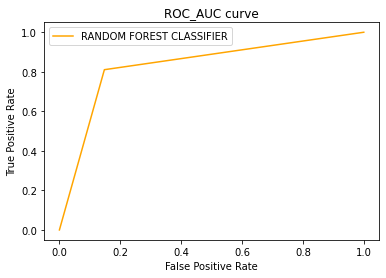

AUC_score 83.14176647020575


In [103]:
plt.plot(fpr,tpr,color='orange',label='RANDOM FOREST CLASSIFIER')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC_AUC curve')
plt.legend()                                                                                 
plt.show()

auc_score = roc_auc_score(y_test,y_pred)*100
print("AUC_score",auc_score)

Accuracy score is 83.36 and AUC_score is 83.14
There is not such variation, means that both the scores are better.

                                            Save the file

In [104]:
import joblib

joblib.dump(RCV.best_params_,'Customer_Churn_Analysis.pkl')

['Customer_Churn_Analysis.pkl']

                                            Conclusion

In [105]:
Prediction=pd.DataFrame({'Actual data':y_test,"Predicted data":y_pred})
Prediction

,Actual data,Predicted data
6856,0.0,0.0
2459,0.0,0.0
8005,1.0,1.0
244,0.0,0.0
5646,1.0,0.0
...,...,...
7674,1.0,1.0
8415,1.0,1.0
406,0.0,0.0
7075,1.0,1.0
